<a href="https://colab.research.google.com/github/Waleed-Azam/00_Basics_CS_MS/blob/master/FYP_Muneeb_YOLOV8_ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FYP- Muneeb, 2025 BSCS
For any questions reach me out azammuneeb5@gmail.com

**YOLOv8 Firearm Detection on Google Colab**

This Colab notebook demonstrates how to train a YOLOv8 model to detect firearms in images. The step-by-step guide includes dataset preparation, model training, and testing on new images, with visualizations of results and accuracy metrics.

**Features**

Dataset Upload: Upload your custom .png images for training and testing.

YOLOv8 Training: Train the model on a firearm dataset with a few epochs.

Testing: Detect firearms in uploaded test images with bounding boxes.

Visualization: Display detection results and training loss curves.

**How to Use**

Step 1: Upload Training Image

The first cell asks you to upload a .png image for training.

It generates a YOLO-compatible label file automatically.

The uploaded image is displayed for confirmation.

Step 2: Train the YOLOv8 Model[linktekst](https://)

The second cell trains the YOLOv8 model using the uploaded dataset.

Once training is complete, a message confirms the success.

Step 3: Upload and Test a New Image

The third cell allows you to upload a new image for testing.

It detects firearms, if any, and labels them with red bounding boxes and the text GUN.

If no firearm is detected, a message indicates "NO GUN detected in the image."

Step 4: View Training Loss Curves

The final cell plots the loss curves for the training process, including:

Box Loss: Measures the accuracy of predicted bounding box coordinates.

Classification Loss: Measures the accuracy of class predictions.

DFL Loss: Distribution Focal Loss for bounding box regression.

**Example Image**

Below is an example output of the model detecting a firearm:



Requirements

Google Colab environment.

Install dependencies using:

!pip install ultralytics matplotlib opencv-python-headless

Notes

Use .png images for training and testing.

Customize the dataset path and configurations in the script if needed.

The model trains for 5 epochs by default for demonstration purposes.

**Outputs**

Trained Model: Saved in the runs/detect directory.

Detection Results: Displayed with bounding boxes and annotations.

Loss Curves: Visualized for insights into the training process.

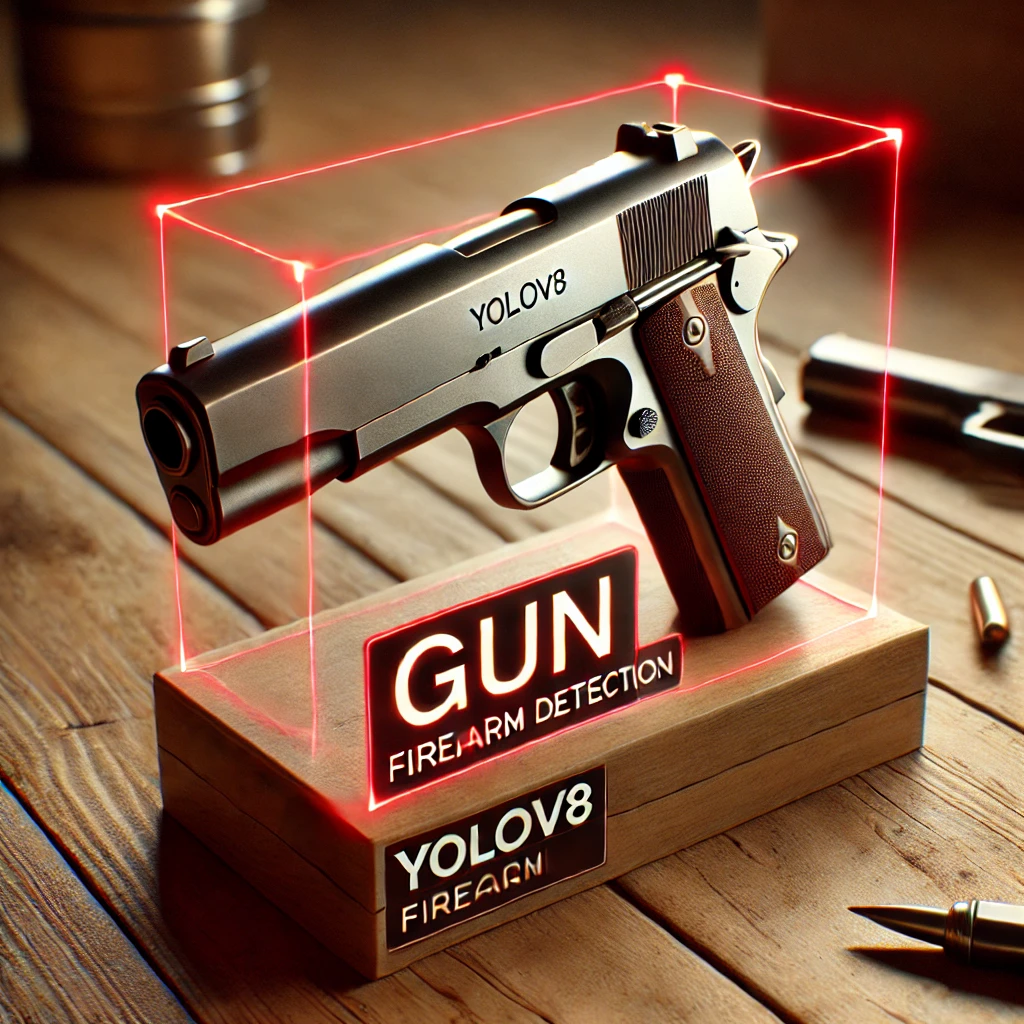

#Upload Image

Please upload a .png image for training and testing.


Saving gun.png to gun (11).png


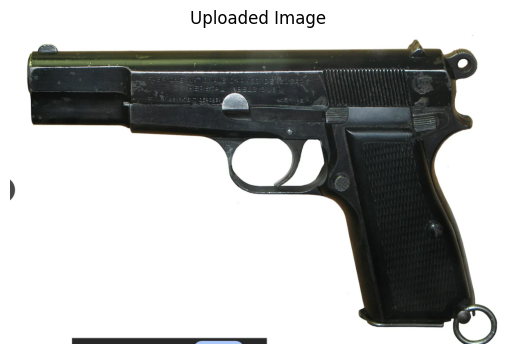

Dataset and configuration file prepared successfully!


In [33]:
### Cell 1: Upload Image for Training and Testing
from google.colab import files
import cv2
import os
import matplotlib.pyplot as plt

# Create directories for dataset
os.makedirs('/content/gun_dataset/images', exist_ok=True)
os.makedirs('/content/gun_dataset/labels', exist_ok=True)

# Ask user to upload a .png image
print("Please upload a .png image for training and testing.")
uploaded = files.upload()

# Save uploaded image
for filename in uploaded.keys():
    uploaded_image_path = filename
    break

train_image_path = '/content/gun_dataset/images/train.png'
test_image_path = '/content/gun_dataset/images/test.png'
img = cv2.imread(uploaded_image_path)
cv2.imwrite(train_image_path, img)
cv2.imwrite(test_image_path, img)

# Display the uploaded image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Uploaded Image')
plt.axis('off')
plt.show()

# Create YOLO label for the uploaded image
# YOLO format: <class_id> <x_center> <y_center> <width> <height>
x_center, y_center, width, height = 0.5, 0.5, 0.6, 0.6  # Example dimensions
train_label_path = '/content/gun_dataset/labels/train.txt'
with open(train_label_path, 'w') as f:
    f.write(f"0 {x_center} {y_center} {width} {height}\n")

# Dynamically create dataset.yaml
dataset_yaml = """
train: /content/gun_dataset/images
val: /content/gun_dataset/images
nc: 1
names: ['gun']
"""
with open('dataset.yaml', 'w') as f:
    f.write(dataset_yaml)

print("Dataset and configuration file prepared successfully!")


#Traning of Model- YOLOV8

In [34]:
### Cell 2: Train YOLOv8 Model
from ultralytics import YOLO

# Load YOLO model
model = YOLO('yolov8n.yaml')

# Train the model
results = model.train(
    data='dataset.yaml',  # Path to dataset.yaml
    epochs=5,  # Short training for demonstration
    imgsz=640,
    batch=1,
    name='gun_detection_model'
)

print("Training finished successfully!")

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=dataset.yaml, epochs=5, time=None, patience=100, batch=1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=gun_detection_model9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

train: Scanning /content/gun_dataset/labels... 2 images, 2 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 575.05it/s]

train: New cache created: /content/gun_dataset/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/gun_dataset/labels.cache... 2 images, 2 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs/detect/gun_detection_model9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/gun_detection_model9
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.377G      1.967      5.694      2.172          0        640: 100%|██████████| 4/4 [00:00<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all          4          2    0.00195          1     0.0186    0.00465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5     0.222G      3.526      3.971      4.266          1        640: 100%|██████████| 4/4 [00:00<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.64it/s]

                   all          4          2    0.00206          1     0.0146    0.00334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5     0.201G      2.245      6.257      2.177          0        640: 100%|██████████| 4/4 [00:00<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.94it/s]

                   all          4          2    0.00206          1     0.0146    0.00334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5     0.201G      2.345      4.764      3.175          4        640: 100%|██████████| 4/4 [00:00<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 22.79it/s]

                   all          4          2    0.00206          1     0.0146    0.00334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5     0.201G      2.616      5.253      3.144          1        640: 100%|██████████| 4/4 [00:00<00:00, 13.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 25.44it/s]

                   all          4          2    0.00206          1     0.0146    0.00334



5 epochs completed in 0.008 hours.
Optimizer stripped from runs/detect/gun_detection_model9/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/gun_detection_model9/weights/best.pt, 6.2MB

Validating runs/detect/gun_detection_model9/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.22it/s]


                   all          4          2    0.00195          1     0.0186    0.00465
Speed: 0.3ms preprocess, 8.5ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/gun_detection_model9
Training finished successfully!


#Testing Of Model  Gun Dectecting OKay!!!

Please upload a test image for detection.


Saving gun.png to gun (12).png

image 1/1 /content/gun (12).png: 416x640 (no detections), 10.8ms
Speed: 2.3ms preprocess, 10.8ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)


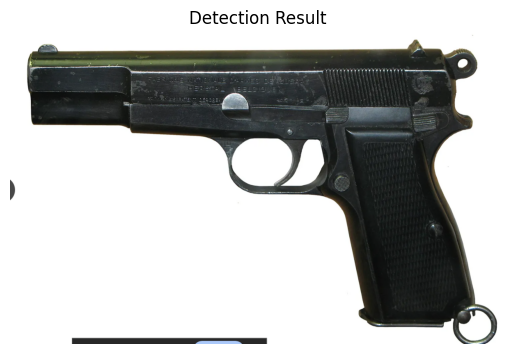

In [35]:
### Cell 3: Test YOLOv8 Model
import matplotlib.pyplot as plt
import cv2

# Ask user to upload a test image
print("Please upload a test image for detection.")
uploaded_test = files.upload()

# Save uploaded test image
for filename in uploaded_test.keys():
    test_image_path = filename
    break

test_img = cv2.imread(test_image_path)

# Test the model
predictions = model.predict(source=test_image_path, conf=0.25)

# Visualize and annotate the output
for result in predictions:
    boxes = result.boxes.xyxy.cpu().numpy()  # Ensure Tensor is on CPU before converting to numpy
    for box in boxes:
        x1, y1, x2, y2 = map(int, box[:4])
        cv2.rectangle(test_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(test_img, 'GUN', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.title('Detection Result')
plt.axis('off')
plt.show()


#Not detecting Gun correctly

Please upload a test image for detection.


Saving potato.png to potato (4).png

image 1/1 /content/potato (4).png: 448x640 (no detections), 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
Detection: NO GUN detected in the image.


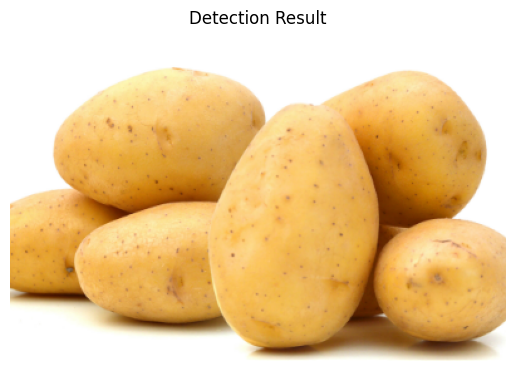

In [37]:
### Cell 3: Test YOLOv8 Model
import matplotlib.pyplot as plt
import cv2

# Ask user to upload a test image
print("Please upload a test image for detection.")
uploaded_test = files.upload()

# Save uploaded test image
for filename in uploaded_test.keys():
    test_image_path = filename
    break

test_img = cv2.imread(test_image_path)

# Test the model
predictions = model.predict(source=test_image_path, conf=0.25)

# Check if any gun is detected
if len(predictions[0].boxes) > 0:
    print("Detection: GUN detected in the image!")
    for result in predictions:
        boxes = result.boxes.xyxy.cpu().numpy()  # Ensure Tensor is on CPU before converting to numpy
        for box in boxes:
            x1, y1, x2, y2 = map(int, box[:4])
            cv2.rectangle(test_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(test_img, 'GUN', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
else:
    print("Detection: NO GUN detected in the image.")

# Display the result
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.title('Detection Result')
plt.axis('off')
plt.show()
